# Unfair data

This notebook generates a dataset that is inherently unfair.

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

We generate cases using the following function. People are randomly placed in the protected class `A` or `B` and randomly assigned an age between 18 and 60 and a location between 0 and 1.
People in `A` are uniformly assigned a wealth while people in `B`
are more likely to get a higher wealth. Then we assign a target to each person which is a function of
their location, wealth and age. Since the wealth is divided unequally, the targets are as well.

In [2]:
def generate_case():
    result = {'protected': random.choice(['A', 'B']),
              'age': random.randint(18, 60),
              'location': random.random()}
    result['wealth'] = random.random() if result['protected'] == 'A' else np.sqrt(random.random())
    result['target'] = random.random()**2 > (1.5*result['location'] * result['wealth'] + 0.1*(result['age'])/60)
    return result

We generate 50000 cases.

In [3]:
df = pd.DataFrame([generate_case() for _ in range(50000)])

Distributions split by target and protected class are shown below.

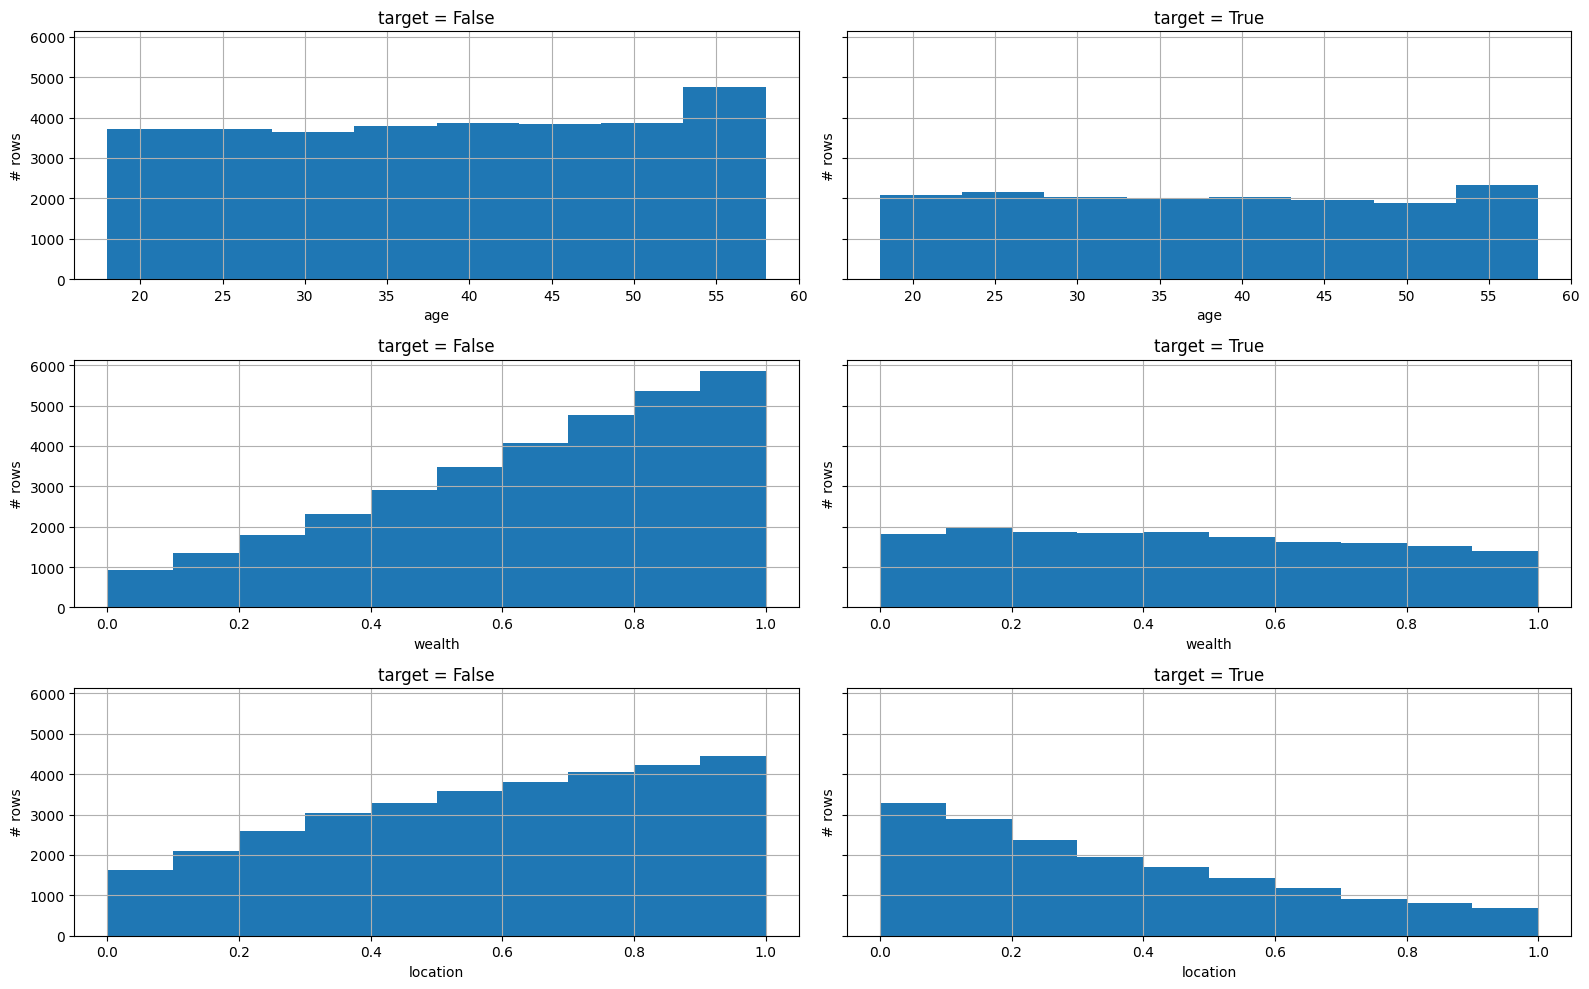

In [4]:
fig, axes = plt.subplots(3, 2, figsize=(16, 10), sharey=True)

for row, feature in zip(axes, ('age', 'wealth', 'location')):
    for ax, target in zip(row, (False, True)):
        df[df.target == target].hist(ax=ax, column=feature, bins=range(18, 62, 5) if feature == 'age' else None)
        ax.set_title('target = {}'.format(target))
        ax.set_xlabel(feature)
        ax.set_ylabel('# rows')
        
fig.tight_layout()

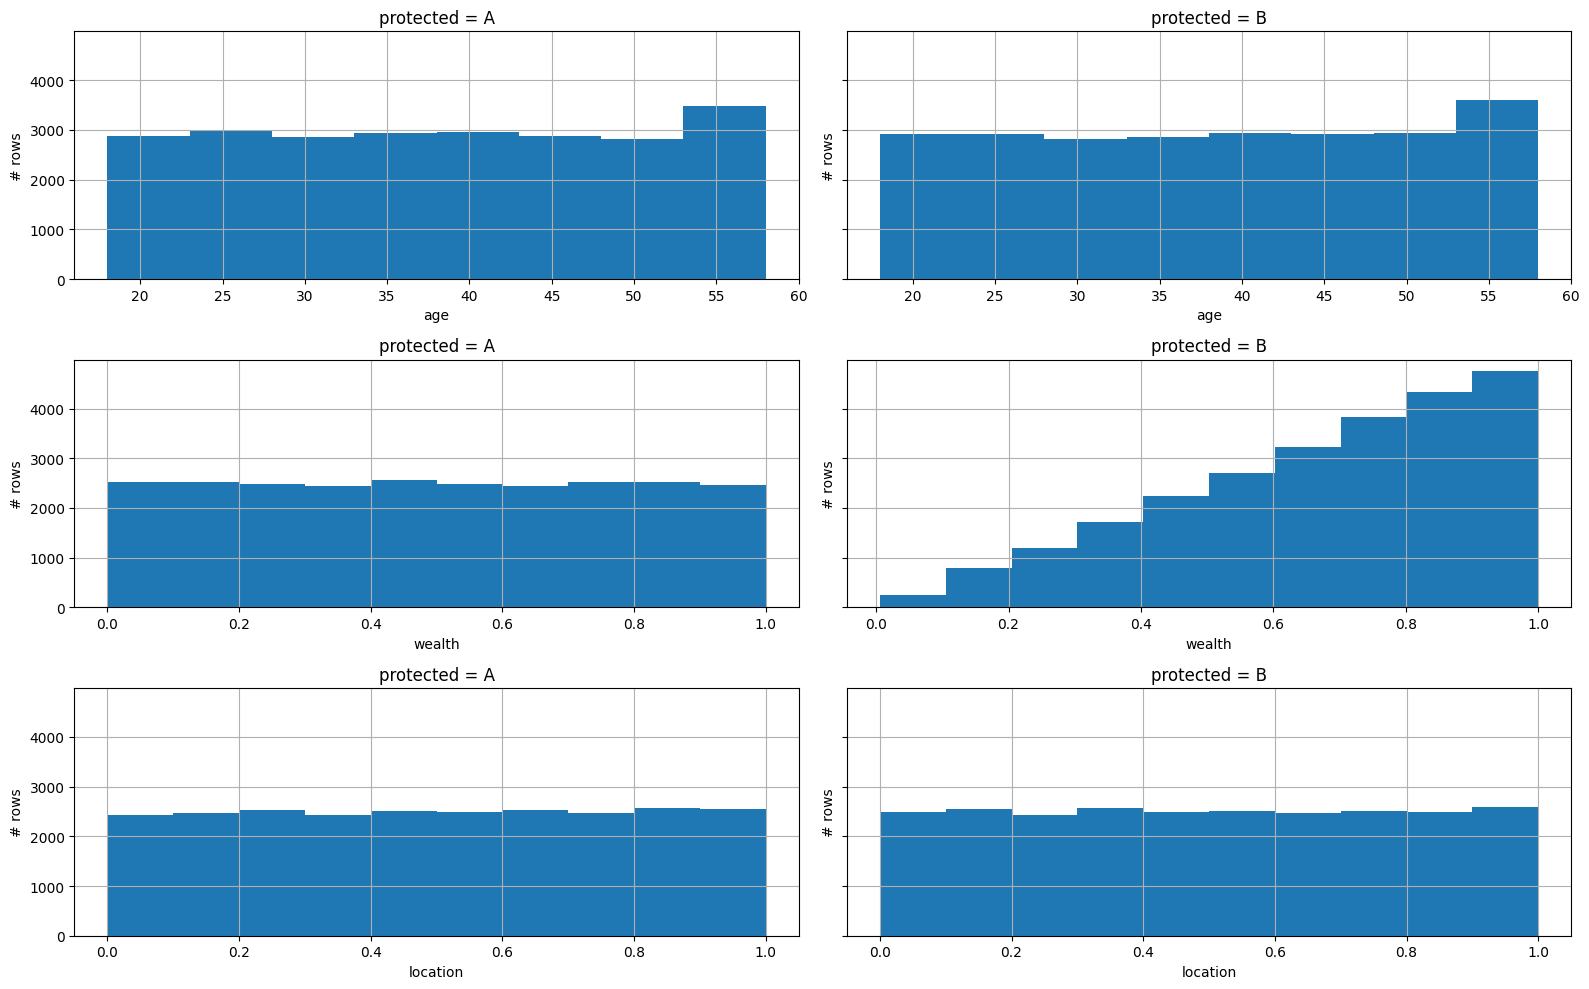

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(16, 10), sharey=True)

for row, feature in zip(axes, ('age', 'wealth', 'location')):
    for ax, prot in zip(row, ('A', 'B')):
        df[df.protected == prot].hist(ax=ax, column=feature, bins=range(18, 62, 5) if feature == 'age' else None)
        ax.set_title('protected = {}'.format(prot))
        ax.set_xlabel(feature)
        ax.set_ylabel('# rows')
        
fig.tight_layout()

Group size split by target and protected group is:

In [6]:
df.groupby(['protected', 'target']).size()

protected  target
A          False     15222
           True       9714
B          False     17553
           True       7511
dtype: int64

Finally we write to file:

In [8]:
df.to_csv('/home/arijit/PycharmProjects/fairDLRM/data/generated.data', index=False)